## Importing libraries

In [1]:
from fastai.imports import *
from fastai.structured import *

In [2]:
!ls

 Data_Train.xlsx	  Sample_submission.xlsx   train.csv
'duration column.ipynb'   sub.csv		   trainRaw
 edit.ipynb		  submission2.xlsx	   tsp.csv
 fastai			  test.csv		   tssp.csv
 featherwali.ipynb	  test-raw		   tst.csv
 final.csv		  testRaw		   Untitled1.ipynb
'lgbm model.ipynb'	  Test_set.xlsx		   Untitled2.ipynb
 sample.csv		  ticket.ipynb		   Untitled.ipynb


In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.sort_values(by='Date_of_Journey', inplace=True)

In [6]:
train.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9848,9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
6024,6024,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594
2405,2405,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270
10383,10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
8308,8308,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649


In [7]:
train["time"] = train["Date_of_Journey"].map(str) + "/"+  train["Dep_Time"]

In [8]:
train.head(5)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,time
9848,9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135,01/03/2019/08:50
6024,6024,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,01/03/2019/11:50
2405,2405,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,01/03/2019/14:05
10383,10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,01/03/2019/07:00
8308,8308,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,12649,01/03/2019/18:25


In [9]:
train.drop(['Unnamed: 0','Date_of_Journey','Dep_Time'], axis=1, inplace=True, )

In [10]:
train.to_csv('tsp.csv', index=False)

In [11]:
!ls

 Data_Train.xlsx	  Sample_submission.xlsx   train.csv
'duration column.ipynb'   sub.csv		   trainRaw
 edit.ipynb		  submission2.xlsx	   tsp.csv
 fastai			  test.csv		   tssp.csv
 featherwali.ipynb	  test-raw		   tst.csv
 final.csv		  testRaw		   Untitled1.ipynb
'lgbm model.ipynb'	  Test_set.xlsx		   Untitled2.ipynb
 sample.csv		  ticket.ipynb		   Untitled.ipynb


In [12]:
now=pd.read_csv('tsp.csv',parse_dates=['time'])

In [13]:
now.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,time
0,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,23:55 02 Mar,39h 5m,2 stops,No info,17135,2019-01-03 08:50:00
1,Air India,Banglore,New Delhi,BLR → MAA → DEL,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,2019-01-03 11:50:00
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,2019-01-03 14:05:00
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,22h 5m,1 stop,No info,26890,2019-01-03 07:00:00
4,IndiGo,Banglore,New Delhi,BLR → DEL,21:20,2h 55m,non-stop,No info,12649,2019-01-03 18:25:00


In [14]:
now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
Airline            10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
time               10683 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 834.7+ KB


In [15]:
train_cats(now)

In [16]:
add_datepart(now, 'time', time=True)

In [17]:
now.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,timeYear,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeHour,timeMinute,timeSecond,timeElapsed
0,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,23:55 02 Mar,39h 5m,2 stops,No info,17135,2019,...,False,False,False,False,False,False,8,50,0,1546505400
1,Air India,Banglore,New Delhi,BLR → MAA → DEL,08:55 02 Mar,21h 5m,1 stop,1 Long layover,14594,2019,...,False,False,False,False,False,False,11,50,0,1546516200
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,07:40 02 Mar,17h 35m,1 stop,1 Long layover,22270,2019,...,False,False,False,False,False,False,14,5,0,1546524300
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,22h 5m,1 stop,No info,26890,2019,...,False,False,False,False,False,False,7,0,0,1546498800
4,IndiGo,Banglore,New Delhi,BLR → DEL,21:20,2h 55m,non-stop,No info,12649,2019,...,False,False,False,False,False,False,18,25,0,1546539900


In [18]:
now.to_feather('trainRaw')

In [19]:
now.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'timeYear', 'timeMonth',
       'timeWeek', 'timeDay', 'timeDayofweek', 'timeDayofyear',
       'timeIs_month_end', 'timeIs_month_start', 'timeIs_quarter_end',
       'timeIs_quarter_start', 'timeIs_year_end', 'timeIs_year_start',
       'timeHour', 'timeMinute', 'timeSecond', 'timeElapsed'],
      dtype='object')

In [20]:
now.timeHour.head()

0     8
1    11
2    14
3     7
4    18
Name: timeHour, dtype: int64

In [21]:
df_trn, y_trn, nas = proc_df(now, 'Price', max_n_cat=100)

In [22]:
df_trn.columns

Index(['Route', 'Arrival_Time', 'Duration', 'timeYear', 'timeMonth',
       'timeWeek', 'timeDay', 'timeDayofweek', 'timeDayofyear',
       'timeIs_month_end', 'timeIs_month_start', 'timeIs_quarter_end',
       'timeIs_quarter_start', 'timeIs_year_end', 'timeIs_year_start',
       'timeHour', 'timeMinute', 'timeSecond', 'timeElapsed',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Airline_nan', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_nan', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Destination_nan',
       'Total_Stops_1 stop'

In [23]:
df_trn.drop(['Arrival_Time'], axis=1, inplace=True)

In [24]:
df_trn.head()

,Route,Duration,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,...,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Additional_Info_nan
0,4,280,2019,1,1,3,3,3,False,False,...,0,0,0,0,0,0,0,1,0,0
1,29,146,2019,1,1,3,3,3,False,False,...,0,0,0,0,0,0,0,0,0,0
2,6,90,2019,1,1,3,3,3,False,False,...,0,0,0,0,0,0,0,0,0,0
3,6,156,2019,1,1,3,3,3,False,False,...,0,0,0,0,0,0,0,1,0,0
4,19,242,2019,1,1,3,3,3,False,False,...,0,0,0,0,0,0,0,1,0,0


In [25]:
y_trn[:10]

array([17135, 14594, 22270, 26890, 12649, 22270, 57209,  9694, 12599, 13439])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_trn, y_trn, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [28]:
Classifier = RandomForestRegressor(n_estimators=300, min_samples_leaf=1, max_features=1, n_jobs=-1, oob_score=True)
%time Classifier.fit(X_train, y_train)

CPU times: user 4.62 s, sys: 145 ms, total: 4.77 s
Wall time: 1.85 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [29]:
#df_test, y_test, nas = proc_df(test)

In [30]:
y_pred=Classifier.predict(X_test)

In [31]:
y_pred

array([10856.84389, 11863.43667,  4470.94333, ...,  2500.07   , 10000.21   ,  8751.38   ])

In [32]:
y_test

array([ 8341, 12373,  3943, ...,  2017, 10844,  6752])

In [33]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [34]:
print_score(Classifier)

[636.1824848602466, 2294.3814074554257, 0.9796859415822325, 0.8021494033562758, 0.8725067218966925]


In [35]:
fi = rf_feat_importance(Classifier, df_trn); fi[:10]

,cols,imp
22,Airline_Jet Airways,0.080388
0,Route,0.079410
48,Total_Stops_non-stop,0.077706
1,Duration,0.077643
17,timeElapsed,0.072088
5,timeDay,0.054473
21,Airline_IndiGo,0.046745
7,timeDayofyear,0.046279
44,Total_Stops_1 stop,0.040298
14,timeHour,0.038363


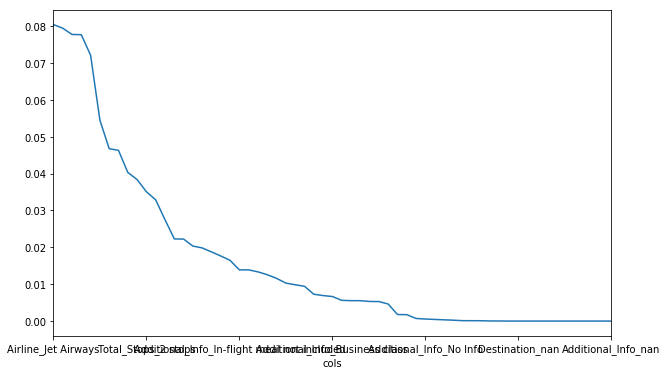

In [36]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [37]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

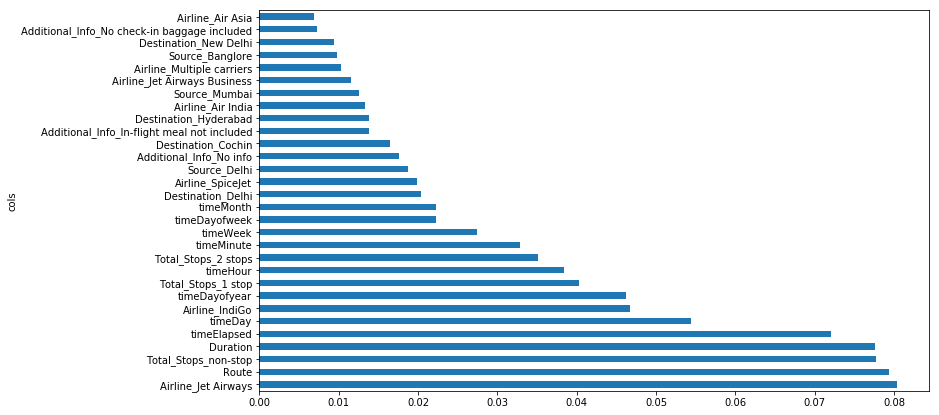

In [38]:
plot_fi(fi[:30]);

In [39]:
to_keep = fi[fi.imp>0.01].cols; len(to_keep)

26

In [40]:
df_keep = df_trn[to_keep].copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_keep, y_trn, test_size = 0.2, random_state = 0)

In [42]:
m = RandomForestRegressor(n_estimators=3000, min_samples_leaf=1, max_features=1,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [43]:
print_score(m)

[651.3322635236005, 2302.1041714561134, 0.9787069210922634, 0.8008152529270967, 0.8644175342134519]


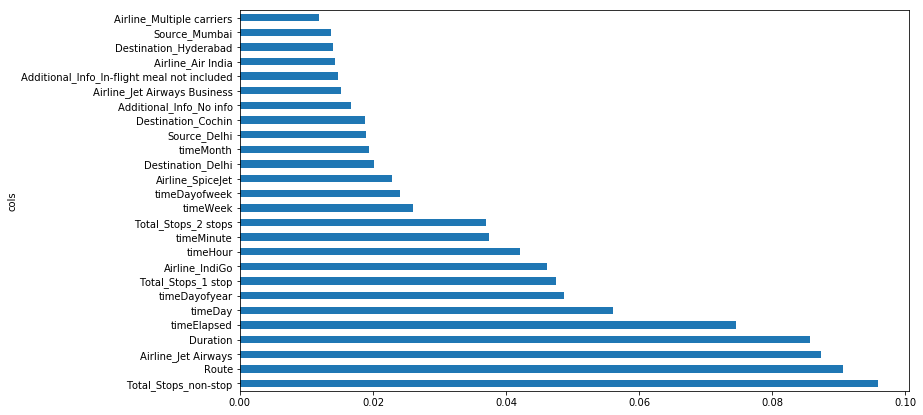

In [44]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [33]:
test=pd.read_csv('test.csv')

In [34]:
test.sort_values(by='Date_of_Journey', inplace=True)

In [35]:
test.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2157,2157,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,09:50,12:35,2h 45m,non-stop,No info
356,356,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,19:10,11h 10m,1 stop,No info
1910,1910,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,05:05 02 Mar,7h 40m,1 stop,No info
2581,2581,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,05:05 02 Mar,12h 10m,1 stop,No info
1500,1500,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → NAG → DEL,08:50,10:35 02 Mar,25h 45m,2 stops,No info


In [36]:
test.drop(['Unnamed: 0'], axis=1, inplace=True, )

In [37]:
test["time"] = test["Date_of_Journey"].map(str) + "/"+  test["Dep_Time"]

In [38]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,time
2157,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,09:50,12:35,2h 45m,non-stop,No info,01/03/2019/09:50
356,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,19:10,11h 10m,1 stop,No info,01/03/2019/08:00
1910,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,05:05 02 Mar,7h 40m,1 stop,No info,01/03/2019/21:25
2581,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,05:05 02 Mar,12h 10m,1 stop,No info,01/03/2019/16:55
1500,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → NAG → DEL,08:50,10:35 02 Mar,25h 45m,2 stops,No info,01/03/2019/08:50


In [39]:
test.drop(['Date_of_Journey','Dep_Time'], axis=1, inplace=True, )

In [40]:
test.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,time
2157,Vistara,Banglore,New Delhi,BLR → DEL,12:35,2h 45m,non-stop,No info,01/03/2019/09:50
356,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,19:10,11h 10m,1 stop,No info,01/03/2019/08:00
1910,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,7h 40m,1 stop,No info,01/03/2019/21:25
2581,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,12h 10m,1 stop,No info,01/03/2019/16:55
1500,Air India,Banglore,New Delhi,BLR → BOM → NAG → DEL,10:35 02 Mar,25h 45m,2 stops,No info,01/03/2019/08:50


In [41]:
test.to_csv('tst.csv', index=False)

In [42]:
df_raw = pd.read_csv('tst.csv', parse_dates=['time'])

In [43]:
test.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,time
2157,Vistara,Banglore,New Delhi,BLR → DEL,12:35,2h 45m,non-stop,No info,01/03/2019/09:50
356,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,19:10,11h 10m,1 stop,No info,01/03/2019/08:00
1910,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,7h 40m,1 stop,No info,01/03/2019/21:25
2581,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,12h 10m,1 stop,No info,01/03/2019/16:55
1500,Air India,Banglore,New Delhi,BLR → BOM → NAG → DEL,10:35 02 Mar,25h 45m,2 stops,No info,01/03/2019/08:50


In [44]:
add_datepart(df_raw, 'time', time=True)

In [45]:
df_raw.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,timeYear,timeMonth,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeHour,timeMinute,timeSecond,timeElapsed
0,Vistara,Banglore,New Delhi,BLR → DEL,12:35,2h 45m,non-stop,No info,2019,1,...,False,False,False,False,False,False,9,50,0,1546509000
1,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,19:10,11h 10m,1 stop,No info,2019,1,...,False,False,False,False,False,False,8,0,0,1546502400
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,7h 40m,1 stop,No info,2019,1,...,False,False,False,False,False,False,21,25,0,1546550700
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,12h 10m,1 stop,No info,2019,1,...,False,False,False,False,False,False,16,55,0,1546534500
4,Air India,Banglore,New Delhi,BLR → BOM → NAG → DEL,10:35 02 Mar,25h 45m,2 stops,No info,2019,1,...,False,False,False,False,False,False,8,50,0,1546505400


In [46]:
df_raw.to_feather('testRaw')

In [47]:
df_tst, y_tst, nas = proc_df(df_raw)

In [48]:
df_tst.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,timeYear,timeMonth,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeHour,timeMinute,timeSecond,timeElapsed
0,10,1,6,17,428,216,5,6,2019,1,...,False,False,False,False,False,False,9,50,0,1546509000
1,5,1,6,6,571,14,1,6,2019,1,...,False,False,False,False,False,False,8,0,0,1546502400
2,5,1,6,6,187,292,1,6,2019,1,...,False,False,False,False,False,False,21,25,0,1546550700
3,5,1,6,6,187,26,1,6,2019,1,...,False,False,False,False,False,False,16,55,0,1546534500
4,2,1,6,11,365,172,2,6,2019,1,...,False,False,False,False,False,False,8,50,0,1546505400


In [49]:
df_raw.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'timeYear', 'timeMonth', 'timeWeek',
       'timeDay', 'timeDayofweek', 'timeDayofyear', 'timeIs_month_end',
       'timeIs_month_start', 'timeIs_quarter_end', 'timeIs_quarter_start',
       'timeIs_year_end', 'timeIs_year_start', 'timeHour', 'timeMinute',
       'timeSecond', 'timeElapsed'],
      dtype='object')

In [50]:
y_new=Classifier.predict(df_tst)

ValueError: Number of features of the model must match the input. Model n_features is 61 and input n_features is 24 

In [63]:
y_new

NameError: name 'y_new' is not defined

In [64]:
sub=pd.DataFrame(y_new)

NameError: name 'y_new' is not defined

In [65]:
sub.head()

NameError: name 'sub' is not defined

In [47]:
sub=sub.astype(int)

In [48]:
sub.to_csv('final.csv', index=False)

In [49]:
!ls


Data_Train.xlsx  sample.csv		 test.csv	train.csv
fastai		 Sample_submission.xlsx  Test_set.xlsx	Untitled.ipynb
final.csv	 sub.csv		 ticket.ipynb


In [50]:
sub.head(5)

,0
0,10222
1,7308
2,11633
3,10193
4,5935


In [1]:
import pandas as pd

In [48]:
data=pd.read_csv('final.csv')

In [52]:
data.head()

,0
0,10222
1,7308
2,11633
3,10193
4,5935
